# MPG Forecasting Project

This project documents the creation and tuning of a linear regression model designed to predict automotive fuel consumption (mpg) using vehicle attribute data (horsepower, number of cylinders, etc.). While this example is relatively general, this type of modeling approach could be adapted to transit agencies which are interested in predicting fleet vehicle mpg as a function of vehicle characteristics (weight, engine displacement, etc) and vehicle usage (age, mileage, years since engine overhaul).

The data was sourced directly from the UCI Machine Learning Database (https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original). This data set contains 405 observations of vehicles from 1970 to 1982. 

This project proceeds as follows:
* Load Libraries and Data
* Clean and Transform the Data
* Visualize the Data
* Build the Model and Perform Diagnostics
* Tune the Model 

# Load Libraries and Data

### Load the Necessary Python Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

### Import the data

The data was imported as a space separated file. Then, the head of the data set was printed to ensured that all variables were parsed correctly. Next, information regarding the variable structures and number of observations was printed. This data set primarily includes numeric variables with one text variable. The data set contains several observations with missing values for mpg and horsepower. 

In [31]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
data_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weights', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(path, sep = "\s+", header = 0, names = data_names)
data = pd.DataFrame(data)
data.head()

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,car_name
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       405 non-null float64
displacement    405 non-null float64
horsepower      399 non-null float64
weights         405 non-null float64
acceleration    405 non-null float64
model_year      405 non-null float64
origin          405 non-null float64
car_name        405 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


### Summary Statistics for MPG Data
Next summary statistics were printed for each of the variables in the data set. 

In [33]:
data.describe()

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin
count,397.000000,405.000000,405.000000,399.000000,405.000000,405.000000,405.000000,405.000000
mean,23.528463,5.469136,194.502469,105.020050,2978.118519,15.528395,75.935802,1.570370
std,7.820926,1.709658,104.903397,38.797303,847.649260,2.801345,3.741767,0.797962
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.500000,2226.000000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2815.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.500000,3620.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Clean and Transform the Data

The data was first cleaned by exploring and handling the missing data. The table below shows that the data set contains 8 observations with missing mpg data and 6 observations with missing values for horsepower. 

In [34]:
data.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weights         0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

### Inspection of missing MPG Data

The observations with missing mpg data were then printed and inspected. The majority of observations with missing mpg values were from model year 1970. Since mpg is the target variable for the model, these observations were then dropped from the data set. 

In [35]:
data_mpg_null = data.loc[data['mpg'].isnull()]
data_mpg_null

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,car_name
9,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
10,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
11,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
12,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
13,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
16,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
366,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [36]:
data = data.dropna(subset=['mpg'], how  = 'all')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 404
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null float64
displacement    397 non-null float64
horsepower      391 non-null float64
weights         397 non-null float64
acceleration    397 non-null float64
model_year      397 non-null float64
origin          397 non-null float64
car_name        397 non-null object
dtypes: float64(8), object(1)
memory usage: 31.0+ KB


### Inspection of Missing Horsepower Data

Observations with missing horsepower values include a wide range of model years and vehicle characteristics. For simplicity, these missing values were replaced with the mean horsepower for the data set. Other methods for imputing missing values include using the median horsepower value, synthetic simulation, and prediction via a secondary regression model. 

In [37]:
data_hp_null = data.loc[data['horsepower'].isnull()]
data_hp_null

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,car_name
37,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
132,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
336,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
342,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
360,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
381,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [38]:
data['horsepower'].fillna((data['horsepower'].mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 404
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null float64
displacement    397 non-null float64
horsepower      397 non-null float64
weights         397 non-null float64
acceleration    397 non-null float64
model_year      397 non-null float64
origin          397 non-null float64
car_name        397 non-null object
dtypes: float64(8), object(1)
memory usage: 31.0+ KB


### Inspection of replaced values

Once the imputed horsepower values were updated, the updated observations were inspected.

In [39]:
hp_replace = data.loc[[37,132,336,342,360,381],:]
hp_replace

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,car_name
37,25.0,4.0,98.0,104.404092,2046.0,19.0,71.0,1.0,ford pinto
132,21.0,6.0,200.0,104.404092,2875.0,17.0,74.0,1.0,ford maverick
336,40.9,4.0,85.0,104.404092,1835.0,17.3,80.0,2.0,renault lecar deluxe
342,23.6,4.0,140.0,104.404092,2905.0,14.3,80.0,1.0,ford mustang cobra
360,34.5,4.0,100.0,104.404092,2320.0,15.8,81.0,2.0,renault 18i
381,23.0,4.0,151.0,104.404092,3035.0,20.5,82.0,1.0,amc concord dl


### Drop car_name

The car_name variable is a unique text name for each vehicle. For simplicity, this column was be dropped as it does not assist in mpg predicition. However, further text mining could be performed to extract the manufacturer into a separate categorical variable. 

In [40]:
data = data.drop(['car_name'], axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0


### Recode the Origin Variable

Vehicle origin represents a categorical variable. American cars are assigned a value of 1. European cars are assigned with a value of 2. Japanese cars are assigned with a value of 3. This variable was then recoded into a character variable. 

In [41]:
cleanup_names = {"origin":{1: 'american', 2:'european', 3:'japanese'}}
data.replace(cleanup_names, inplace=True)

### Create Dummy Variables for Origin

In order to incorporate this variable into the predicition model, it was then converted into three binary dummy variables which have the values 0 and 1 where 1 represents an observation belonging to a given origin class. 

In [42]:
origin_dummies = pd.get_dummies(data['origin'])
origin_dummies.head()

,american,european,japanese
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Merge the Data Sets

The origin_dummies data frame does not contain any of the additional vehicle characteristics. As a result, these variables were then merges with the full data set. 

In [43]:
data = pd.concat([data, origin_dummies], axis = 1)
data.tail()

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,american,european,japanese
400,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,american,1,0,0
401,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,european,0,1,0
402,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,american,1,0,0
403,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,american,1,0,0
404,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,american,1,0,0


# Analyze and Visualize the Data

### Plot Histograms of Variables

Histograms were then plotted for each of the variables. 

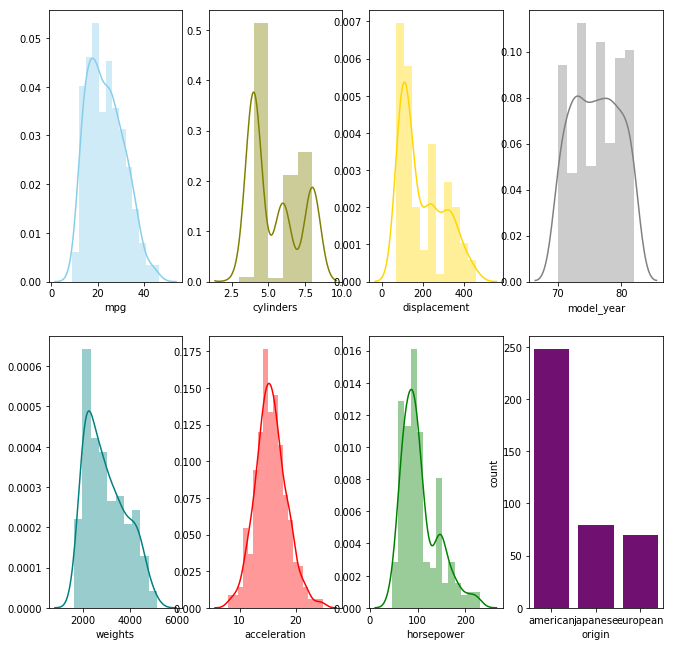

In [44]:
f, axes = plt.subplots(2, 4, figsize=(11, 11), sharex=False)
sns.distplot( data["mpg"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["cylinders"] , color="olive", ax=axes[0, 1])
sns.distplot( data["displacement"] , color="gold", ax=axes[0, 2])
sns.distplot( data["model_year"] , color="grey", ax=axes[0, 3])
sns.distplot( data["weights"] , color="teal", ax=axes[1, 0])
sns.distplot( data["acceleration"] , color="red", ax=axes[1, 1])
sns.distplot( data["horsepower"] , color="green", ax=axes[1, 2])
sns.countplot(data['origin'], color = 'purple', ax = axes[1,3])

### Plot Scatter Plots of Variables

Next scatterplots were created between mpg and each of the independent variables. 

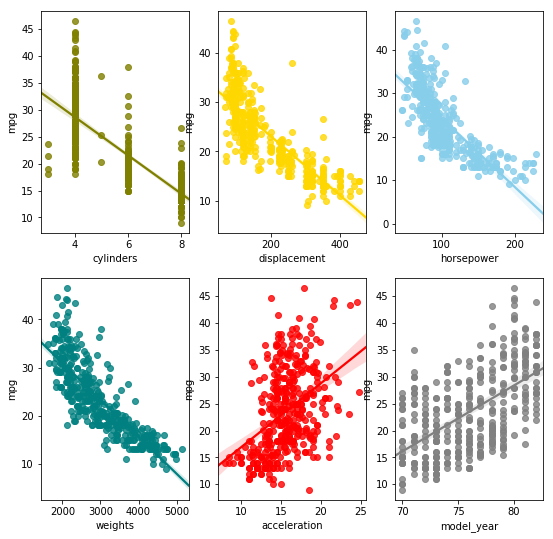

In [45]:
f, axes = plt.subplots(2, 3, figsize=(9, 9), sharex=False)

sns.regplot(x = data["cylinders"], y = data['mpg'] , color="olive", ax=axes[0, 0])
sns.regplot(x = data["displacement"], y = data['mpg'] , color="gold", ax=axes[0, 1])
sns.regplot(x = data["horsepower"], y = data['mpg'] , color="skyblue", ax=axes[0, 2])
sns.regplot(x = data["weights"], y = data['mpg'] , color="teal", ax=axes[1, 0])
sns.regplot(data["acceleration"], y = data['mpg'] , color="red", ax=axes[1, 1])
sns.regplot(data["model_year"], y = data['mpg'] , color="grey", ax=axes[1, 2])

### Calculate Correlation Matrix

A correlation matrix was then calculated to measure the relative correlation between mpg and the independent variables. The chart shows that there is a wide range of strong and weak positive and correlated variables. 

In [46]:
corr_matrix = data.corr()
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.578667
japanese        0.441704
acceleration    0.419133
european        0.258432
american       -0.567600
horsepower     -0.771181
cylinders      -0.775412
displacement   -0.803972
weights        -0.831558
Name: mpg, dtype: float64

# Build the Model and Perform Diagnostics

### Split the Data into Training and Test Data Sets
The data was then split into traning and test data sets. This allowed for the model to be trained on a subset of data and calculate model performance by comparing the predicted values of the mpg for the test data set against the observed mpg values from the test data set. The data set was split such that a random sample of 70% observations were included in the training data set and the remaining 30% of observations were included in the test data set. 

Next unecessary variables were removed. The number of cylinders, engine displacement, horespower, vehicle weight, and acceleration are included as these variables will very likely have an impact on vehicle MPG. Model year is included as a continious variable. This variable is included as a proxy for technological change and vehicle pollution regulations. Origin is not included as this variable is now captured as a series of dummy variables. The dummy variable for American cars is excluded. This is done to prevent the incorporation of a perfect colinear group of variables. 

In [47]:
y = data['mpg']
x = data[['cylinders', 'displacement', 'horsepower', 'weights', 'acceleration', 'model_year', 'european', 'japanese']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Build the Linear Regression Model
A regression model was built using the training data sets. Next, the R Squared Statistic was calculated. The R squared statistic for this model was .8236. This implies the model explains 82% of the variation in the data set. 

In [48]:
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)
print('Linear Regression R squared": %.4f' % lm_model.score(x_train, y_train))

Linear Regression R squared": 0.8236


### Generate Predictions and Assess Prediction Model Accuracy
Now the model is used to calculated the predicted mpg values for the test data set. The predicted values were then compared to the observed mpg data for the test data set using the Root Mean Squared Deviation metric. This metric measures the distance between the predicted mpg values against the observed mpg values from the test data set. This model has an RMSE of 3.1113. This implies that the model can predict mpg within 3.1 miles per gallon.   

In [49]:
y_pred = lm_model.predict(x_test)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 3.1113


# Tune the Model

### Feature Engineering
The initial model produced promising results. However, further model tuning was performed to increase model performance. The data exploration scatter plots suggest that the relationship between mpg and displacement / horsepower / weight is non linear. As a result squared terms for displacement / horsepower / weights were created to account for this non linear relationship. 

Additionally, many cars with low horsepower and low weight tend to have higher horsepower than vehicles with low horsepower and high weight. As a result the power / weight ratio was calculated to capture this relationship. 

In [50]:
data['displacement_sq'] = data['displacement'] ** 2
data['horsepower_sq'] = data['horsepower'] ** 2
data['weights_sq'] = data['weights'] ** 2
data['pwr_wght_ratio'] = data['horsepower'] / data['weights']
data.head()

,mpg,cylinders,displacement,horsepower,weights,acceleration,model_year,origin,american,european,japanese,displacement_sq,horsepower_sq,weights_sq,pwr_wght_ratio
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,american,1,0,0,122500.0,27225.0,13638249.0,0.044679
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,american,1,0,0,101124.0,22500.0,11806096.0,0.043655
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,american,1,0,0,92416.0,22500.0,11785489.0,0.043694
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,american,1,0,0,91204.0,19600.0,11895601.0,0.040591
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,american,1,0,0,184041.0,39204.0,18844281.0,0.045612


### Run the Model with New Variables
The model was then ran using the original data set and the new paramaters. The R Suqared Statistic for this model was .8712. This was higher than the original model R Squared of .8236

In [51]:
y = data['mpg']
x = data[['cylinders', 'displacement', 'horsepower', 'weights', 'acceleration', 'model_year', 'european', 'japanese', 'displacement_sq', 'horsepower_sq', 'weights_sq','pwr_wght_ratio']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lm_model = LinearRegression()
lm_model.fit(x_train, y_train)
print('Linear Regression R squared": %.4f' % lm_model.score(x_train, y_train))

Linear Regression R squared": 0.8712


### Revised Model Performance

After re-running the model, the revised RMSE statistic was calculated. The RMSE for the updated model was 2.9878. This was a decrease from the original model RMSE of 3.1113. This implies that the additional variables increased overall model performance. Further modeling tuning should be explored to improve prediction accuracy.  

In [52]:
y_pred = lm_model.predict(x_test)
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 2.9878
